In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="whitegrid")

In [3]:
import plotly
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [4]:
#data_dir = "../input/aml-fab-with-names/"
data_dir = "../input/aml-fab-with-names/"

In [5]:
df = pd.read_csv(data_dir + "GSE147515_FAB_mat.csv")

In [6]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20650,20651,20652,20653,20654,20655,20656,20657,20658,20659
Unnamed: 0,RFC2_1,HSPA6_2,PAX8_3,GUCA1A_4,THRA_5,PTPN21_6,CCL5_7,CYP2E1_8,EPHB3_9,ESRRAP1_10,...,36994_at_41985,NUS1P3_41991,PAOX_42180,52169_at_42194,DND1P1_42236,64408_s_at_42266,TMEM231_42275,81737_at_42298,STX16-NPEPL1_42301,90610_at_42305
GSM1254265.CEL,7.53784,4.679401,6.798042,2.704549,4.544424,3.734027,8.996447,3.287267,4.351481,6.518411,...,10.981339,4.517542,4.891077,8.200771,7.25395,5.97591,3.074506,5.782047,6.884389,9.224288
GSM1254267.CEL,6.800871,4.77795,7.370561,2.500655,5.050274,3.630663,9.407635,3.28878,4.236406,5.842252,...,10.468569,4.11304,4.841508,7.980198,7.236794,4.020682,2.837487,5.998033,6.466569,8.821587
GSM1254268.CEL,6.752669,4.360962,7.0438,2.644052,4.988216,3.587355,10.533326,3.280259,3.981492,6.299722,...,10.711803,4.068517,5.023201,7.930454,5.995227,5.394315,2.773762,5.723267,6.485259,9.134468
GSM1254269.CEL,5.929756,4.509553,7.132901,2.712234,4.862662,4.006397,6.943279,3.276929,4.125557,6.348118,...,10.437288,4.475626,5.489756,8.13383,6.6036,5.085051,2.76059,6.0036,6.750198,8.010974


In [7]:
df.columns = df.iloc[-1]
df.drop(["Unnamed: 0", "name"], axis=0, inplace=True)
df.head()

name,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRAP1,...,36994_at,NUS1P3,PAOX,52169_at,DND1P1,64408_s_at,TMEM231,81737_at,STX16-NPEPL1,90610_at
GSM1254265.CEL,7.53784,4.679401,6.798042,2.704549,4.544424,3.734027,8.996447,3.287267,4.351481,6.518411,...,10.981339,4.517542,4.891077,8.200771,7.25395,5.97591,3.074506,5.782047,6.884389,9.224288
GSM1254267.CEL,6.800871,4.77795,7.370561,2.500655,5.050274,3.630663,9.407635,3.28878,4.236406,5.842252,...,10.468569,4.11304,4.841508,7.980198,7.236794,4.020682,2.837487,5.998033,6.466569,8.821587
GSM1254268.CEL,6.752669,4.360962,7.0438,2.644052,4.988216,3.587355,10.533326,3.280259,3.981492,6.299722,...,10.711803,4.068517,5.023201,7.930454,5.995227,5.394315,2.773762,5.723267,6.485259,9.134468
GSM1254269.CEL,5.929756,4.509553,7.132901,2.712234,4.862662,4.006397,6.943279,3.276929,4.125557,6.348118,...,10.437288,4.475626,5.489756,8.13383,6.6036,5.085051,2.76059,6.0036,6.750198,8.010974
GSM1254270.CEL,7.353971,4.720435,7.272406,2.861128,5.14475,3.762099,9.159402,3.475974,4.354445,6.7036,...,10.969873,4.562113,4.649189,8.04354,6.893824,5.49724,2.74171,5.948172,6.706266,9.504773


In [8]:
df.shape

(464, 20660)

In [9]:
lbl = pd.read_csv(data_dir + "GSE147515_FAB_lbl.csv")
lbl.head()

,Unnamed: 0,X,FAB
0,1,GSM1254265.CEL,M2
1,3,GSM1254267.CEL,M5
2,4,GSM1254268.CEL,M2
3,5,GSM1254269.CEL,M1
4,6,GSM1254270.CEL,M4


In [10]:
lbl.FAB.value_counts()

CTRL    198
M2       76
M1       66
M4       52
M5       32
M3       20
M0       20
Name: FAB, dtype: int64

In [11]:
lbl_filtered = lbl.loc[lbl.FAB.isin(["CTRL", "M4"])]

In [12]:
lbl_filtered.FAB.value_counts()

CTRL    198
M4       52
Name: FAB, dtype: int64

In [13]:
df_filtered = df.loc[df.index.isin(lbl_filtered.X)]
df_filtered.head()

name,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRAP1,...,36994_at,NUS1P3,PAOX,52169_at,DND1P1,64408_s_at,TMEM231,81737_at,STX16-NPEPL1,90610_at
GSM1254270.CEL,7.353971,4.720435,7.272406,2.861128,5.14475,3.762099,9.159402,3.475974,4.354445,6.7036,...,10.969873,4.562113,4.649189,8.04354,6.893824,5.49724,2.74171,5.948172,6.706266,9.504773
GSM1254272.CEL,6.716364,5.432612,7.215697,2.820453,4.871102,3.754732,9.431691,3.483898,4.503141,6.203597,...,11.149506,4.164266,4.742064,7.621507,5.891815,6.324222,3.078253,5.174717,7.329092,8.90469
GSM1254273.CEL,7.407105,4.435121,7.225802,2.752378,4.981282,3.931028,7.621648,3.374395,4.069372,6.396803,...,11.036675,4.772213,6.508118,7.879433,6.986671,6.712675,2.907534,5.317616,6.932983,9.337613
GSM1254280.CEL,7.680327,4.994352,6.927217,2.585253,5.763367,3.892575,7.487104,3.505815,4.245496,6.276929,...,10.519345,4.450528,5.52982,7.906821,6.315926,6.155174,3.49854,5.996632,6.51499,8.671897
GSM1254287.CEL,6.69846,5.879352,7.130658,2.582562,5.120772,3.968634,6.356519,3.389832,4.078997,6.671461,...,10.1553,4.585334,4.256982,7.129632,5.464938,5.556841,3.62348,5.343482,6.960257,7.645146


In [14]:
df_filtered.shape

(250, 20660)

In [15]:
lbl_filtered.head()

,Unnamed: 0,X,FAB
4,6,GSM1254270.CEL,M4
6,8,GSM1254272.CEL,M4
7,9,GSM1254273.CEL,M4
13,15,GSM1254280.CEL,M4
17,20,GSM1254287.CEL,M4


In [16]:
lbl_filtered.set_index(lbl_filtered.X, inplace=True)
lbl_filtered.drop(["Unnamed: 0", "X"], axis=1, inplace=True)
lbl_filtered.head()

,FAB
X,
GSM1254270.CEL,M4
GSM1254272.CEL,M4
GSM1254273.CEL,M4
GSM1254280.CEL,M4
GSM1254287.CEL,M4


In [17]:
lbl_filtered.FAB = lbl_filtered.FAB.map({"CTRL": 0, "M4": 1})
lbl_filtered.head()

,FAB
X,
GSM1254270.CEL,1
GSM1254272.CEL,1
GSM1254273.CEL,1
GSM1254280.CEL,1
GSM1254287.CEL,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_filtered.values
y = lbl_filtered.values

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## LGBM

In [23]:
import lightgbm as lgb

In [24]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, StratifiedKFold
from sklearn.feature_selection import SelectFromModel

In [25]:
# From GridSearch
lgbm_params = {
    'drop_rate': 0.1,
    'max_depth': 15,
    'n_estimators': 500,
    'learning_rate': 0.1,
    'num_leaves': 15,
    'reg_alpha': 0.001,
    'reg_lambda': 0.01
}

scale_pos_weight = (y == 0).sum() / (y == 1).sum()

lgbm = lgb.LGBMClassifier(
    metric="auc",
    scale_pos_weight=scale_pos_weight,
    min_gain_to_split=0.001,
    n_jobs=4,
    **lgbm_params,
)

In [26]:
lgbm_selector = SelectFromModel(estimator=lgbm, max_features=200).fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


In [27]:
ind = lgbm_selector.get_support(indices=True)
lgbm_features = df.columns[ind]
lgbm_features

Index(['SCARB1', 'TIMD4', 'ATP6V1E2', 'MFAP3', 'CNOT7', 'TM2D3', 'CPA6',
       'RXFP1', 'ZNF625', 'CLEC4D', 'STMN1', 'MMEL1', 'B3GNT7', 'SDCCAG8',
       'UBR5-AS1', 'BTBD19', '1557472_a_at', 'LINC00271', 'LINC01970',
       'AKR1A1', 'BAK1', 'GCA', 'TFF3', 'FEN1', 'ANG', 'TCN1', 'HP', 'CRISP3',
       'AMPD3', 'CD24', 'TRIP6', 'ANXA3', 'GABPA', 'CAMP', 'PEBP1', 'SFXN3',
       'LARS1', 'OSBPL11', 'CHCHD7', 'SLC25A15', 'CYSTM1', 'KMT2E-AS1',
       'TRARG1', 'DZIP1L'],
      dtype='object', name='name')

In [28]:
len(lgbm_features)

44

# RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
"""
rf_params = {
    "max_depth": [10,15,25],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [3,10,25],
    "n_estimators": [100,300,500],
    "criterion": ["gini"],
}
"""
rf_params = {'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 500}

rf = RandomForestClassifier(class_weight="balanced", random_state=0, **rf_params)
#gsRf = GridSearchCV(rf, rf_params, cv=10, n_jobs=4, verbose=5)

In [31]:
#gsRf.fit(X, y)

In [32]:
#gsRf.best_params_

In [33]:
#rf_best = gsRf.best_estimator_
#gsRf.best_score_

In [34]:
rf_selector = SelectFromModel(rf, max_features=200).fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:224: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [35]:
ind = rf_selector.get_support(indices=True)
rf_features = df.columns[ind]
rf_features

Index(['1552632_a_at', 'CLEC4D', 'KBTBD6', 'ABCA13', 'HTRA4', 'WDR49',
       'DNAJA4', 'S100Z', '1554892_a_at', 'ACY3',
       ...
       'IGSF10', '230856_at', 'PCAT6', 'HOXB4', 'GJB6', 'TLCD4', 'RGL4',
       'BCL2L15', 'SLC16A14', '241353_s_at'],
      dtype='object', name='name', length=200)

In [36]:
len(rf_features)

200

# Logistic Reg

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
"""
lr_params = {
    "C": [0.01, 0.1, 1, 10]
}
"""
lr = LogisticRegression(penalty="l2", C=0.01)
#gsLR = GridSearchCV(lr, lr_params, cv=10, verbose=1, n_jobs=4)

In [39]:
#gsLR.fit(X, y)

In [40]:
#lr_best = gsLR.best_estimator_
#gsLR.best_params_

In [41]:
lr_selector = SelectFromModel(lr, max_features=200).fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [42]:
ind = lr_selector.get_support(indices=True)
lr_features = df.columns[ind]
lr_features

Index(['CACNA2D4', 'CLEC4D', 'ABCA13', 'C20orf197', 'ERVW-1', 'HTRA4',
       'NKX2-3', '1554517_x_at', 'S100Z', '1554892_a_at',
       ...
       'GJB6', 'ANKRD33B', 'RGL4', 'SOCAR', 'HSD11B1-AS1', 'SLC16A14', 'RBP7',
       'GLYCTK', '241353_s_at', 'NPW'],
      dtype='object', name='name', length=200)

# Chi Squared

In [43]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
norm_scaler = MinMaxScaler()
X_norm = norm_scaler.fit_transform(X)

In [46]:
chi2_selector = SelectKBest(score_func=chi2, k=200).fit(X_norm, y)

In [47]:
ind = chi2_selector.get_support(indices=True)
chi2_features = df.columns[ind]
chi2_features

Index(['SCARB1', 'CACNA2D4', 'RXFP1', 'KBTBD6', 'UMODL1', 'NEGR1', 'ABCA13',
       'NKX2-3', 'WDR49', 'S100Z',
       ...
       'STYXL2', 'TLCD4', 'RGL4', 'FCRL1', 'RFESD', 'C17orf99', 'SLC16A14',
       'ANKRD22', 'PAN3-AS1', 'NPW'],
      dtype='object', name='name', length=200)

# LASSO

In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasso = Lasso(random_state=0, alpha=0.001, tol=0.001)
"""
lasso_params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "tol": [0.001, 0.01],
}
"""
#gsLASSO = GridSearchCV(lasso, lasso_params, cv=10, verbose=1, scoring="neg_mean_absolute_error", n_jobs=4)

'\nlasso_params = {\n    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],\n    "tol": [0.001, 0.01],\n}\n'

In [50]:
#gsLASSO.fit(X, y)
lasso_selector = SelectFromModel(lasso, max_features=200).fit(X, y)

In [51]:
#lasso_best = gsLASSO.best_estimator_
#gsLASSO.best_params_

In [52]:
#gsLASSO.best_score_

In [53]:
ind = lasso_selector.get_support(indices=True)
lasso_features = df.columns[ind]
lasso_features

Index(['C5orf17', 'WNT9B', 'SYCP3', 'WDFY4', '1554517_x_at', 'IHO1', 'ACY3',
       'SLC25A41', 'ERVFRD-1', 'SMIM21',
       ...
       'PALD1', 'ANKRD33B', 'ADM5', '232318_s_at', 'ILF3-DT', '237193_s_at',
       'SMIM31', 'AADACL2', 'SFTA2', '244571_s_at'],
      dtype='object', name='name', length=116)

# Combine Features

In [54]:
import collections

In [55]:
def get_freq(feature_lists):
    counts = collections.defaultdict(int)
    for l in feature_lists:
        for x in l:
            counts[x] += 1
    
    return pd.DataFrame.from_dict(counts, orient="index")

In [56]:
data = [
    lgbm_features,
    rf_features,
    lr_features,
    lasso_features,
    chi2_features,
]

feature_freqs = get_freq(data)

In [57]:
feature_freqs.value_counts()

1    319
2    109
3     55
4     12
5      2
dtype: int64

In [58]:
feature_freqs.to_csv("m4_features.csv")

# Training with all features

In [59]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [60]:
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=0)

predicts = []
accuracy_scores = []
log_loss_scores = []

In [61]:
def train_model_lgbm(model, X):
    predicts = []
    accuracy_scores = []
    log_loss_scores = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=0)

        """
        y_pred = model.predict(X_test)
        predicts.append(y_pred)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        log_loss_scores.append(log_loss(y_test, y_pred))
        """

In [62]:
def train_model(model, X):
    predicts = []
    accuracy_scores = []
    log_loss_scores = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]
        model.partial_fit(X_train, y_train)

        y_pred = model.predict(X_val)
        predicts.append(y_val)
        accuracy_scores.append(accuracy_score(y_val, y_pred))
        log_loss_scores.append(log_loss(y_val, y_pred))

In [63]:
def print_results(model, X_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    
    total = sum(cm)
    accuracy = (tp+tn)/(tp+tn+fn+fp)
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    print("Accuracy: ", accuracy)
    print("Sensitivity: ", sensitivity)
    print("Sepcificity: ", specificity)
    print("Counfsion Matrix: \n", cm)

In [64]:
def graph_importances(model, model_name):
    ind = np.argsort(model.feature_importances_)[::-1][:20]
    g = sns.barplot(
        y = df.columns[ind][:20],
        x = model.feature_importances_[ind][:20],
        orient = "h",
    )
    g.set_xlabel("Importance")
    g.set_ylabel("Symbol")
    g.set_title(model_name + " feature importance")
    g.figure.savefig(model_name + " feature importance.png", bbox_inches='tight')

In [65]:
clf = lgb.LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    min_gain_to_split=0.001,
    n_jobs=4,
    **lgbm_params,
)
train_model_lgbm(clf, X)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

In [66]:
print_results(clf, X_test)

Accuracy:  1.0
Sensitivity:  1.0
Sepcificity:  1.0
Counfsion Matrix: 
 [[40  0]
 [ 0 10]]


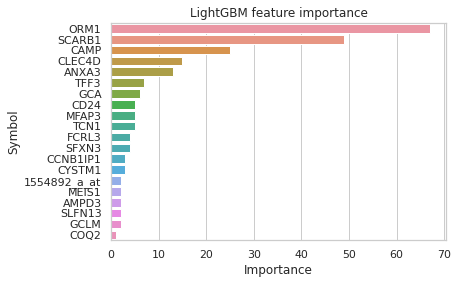

In [67]:
graph_importances(clf, "LightGBM")

In [68]:
clf = RandomForestClassifier(
    class_weight="balanced", 
    random_state=0, 
    **rf_params,
)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=10, n_estimators=500, random_state=0)

In [69]:
print_results(clf, X_test)

Accuracy:  1.0
Sensitivity:  1.0
Sepcificity:  1.0
Counfsion Matrix: 
 [[40  0]
 [ 0 10]]


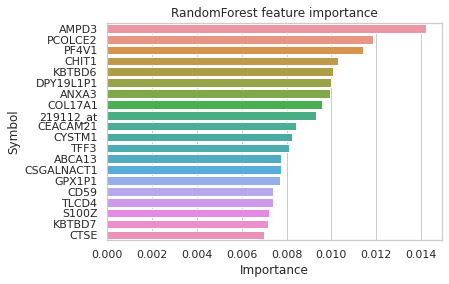

In [70]:
graph_importances(clf, "RandomForest")

In [71]:
clf = DecisionTreeClassifier(
    class_weight="balanced", 
    random_state=0, 
    max_depth = 25,
    min_samples_split=3,
    criterion="gini",
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=25,
                       min_samples_split=3, random_state=0)

In [72]:
print_results(clf, X_test)

Accuracy:  1.0
Sensitivity:  1.0
Sepcificity:  1.0
Counfsion Matrix: 
 [[40  0]
 [ 0 10]]


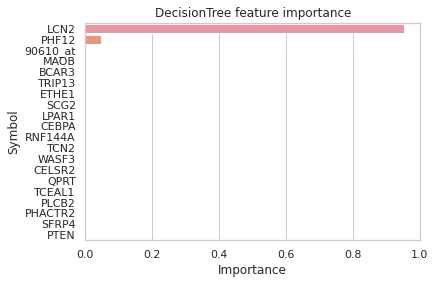

In [73]:
graph_importances(clf, "DecisionTree")

# Selected features

In [74]:
feature_freqs.head()

,0
SCARB1,2
TIMD4,1
ATP6V1E2,1
MFAP3,1
CNOT7,1


In [75]:
feature_freqs.columns = ["freq"]
feature_freqs.sort_values(by=["freq"], ascending=False)

,freq
CAMP,5
CRISP3,5
MEIS1,4
GCA,4
TCN1,4
...,...
ACTN1,1
CD8B,1
207860_at,1
HTR7,1


In [76]:
top = feature_freqs.loc[feature_freqs.freq >=3]
top.shape

(69, 1)

In [77]:
top.to_csv("m4_top.csv")

In [78]:
# new_df only has top selected features
new_df = df_filtered.loc[:, df_filtered.columns.isin(top.index)]
new_df.shape

(250, 69)

In [79]:
new_df.head()

name,CLEC4D,ABCA13,S100Z,ACY3,MEIS1,WASIR2,CD99,KRT18,TIMP1,EPCAM,...,LGALSL,CYSTM1,SUSD3,GGTA1,ILDR2,MS4A14,PCAT6,GJB6,RGL4,SLC16A14
GSM1254270.CEL,4.915505,2.447978,7.409734,5.563925,3.465298,5.291387,10.203331,4.554234,10.132328,3.429545,...,5.100236,6.996529,6.196561,7.035418,5.381926,5.230998,5.170758,5.021292,7.689461,3.434743
GSM1254272.CEL,7.46534,2.787607,6.034095,6.188492,4.630401,5.96781,9.765519,8.196313,11.126318,6.563194,...,5.686492,7.594875,6.7016,8.215126,3.620615,4.311891,5.531317,6.175046,9.429852,3.562025
GSM1254273.CEL,6.478618,3.431213,8.035879,5.488559,7.725664,3.470964,11.134684,5.034347,10.417112,3.305298,...,4.359263,7.887977,5.788465,8.06248,4.46432,5.024285,5.35068,4.649763,6.353593,3.765165
GSM1254280.CEL,4.160697,2.322912,7.521873,6.167945,4.718339,5.787785,11.494334,4.978088,11.114258,5.144315,...,4.883755,9.34225,5.086646,7.427163,6.538788,6.981071,3.983972,2.980804,5.622909,5.993585
GSM1254287.CEL,5.890832,2.685483,4.080371,5.578478,7.918025,5.792119,9.41756,7.707482,12.140655,8.620962,...,7.276739,8.730315,5.77354,5.017731,3.737695,4.041276,5.610847,5.425435,5.634872,5.558879


In [80]:
features = new_df.columns

In [81]:
X_sel = new_df.values

In [82]:
X_sel = scaler.fit_transform(X_sel)

In [83]:
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, stratify=y, random_state=0)

In [84]:
clf = lgb.LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    min_gain_to_split=0.001,
    n_jobs=4,
    **lgbm_params,
)
train_model_lgbm(clf, X_sel)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

In [85]:
print_results(clf, X_sel_test)

Accuracy:  1.0
Sensitivity:  1.0
Sepcificity:  1.0
Counfsion Matrix: 
 [[40  0]
 [ 0 10]]


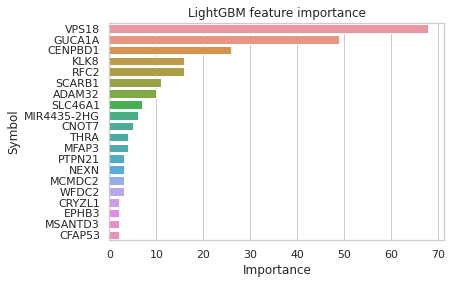

In [86]:
graph_importances(clf, "LightGBM")

In [87]:
clf = RandomForestClassifier(
    class_weight="balanced", 
    random_state=0, 
    **rf_params,
)
clf.fit(X_sel_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=10, n_estimators=500, random_state=0)

In [88]:
print_results(clf, X_sel_test)

Accuracy:  1.0
Sensitivity:  1.0
Sepcificity:  1.0
Counfsion Matrix: 
 [[40  0]
 [ 0 10]]


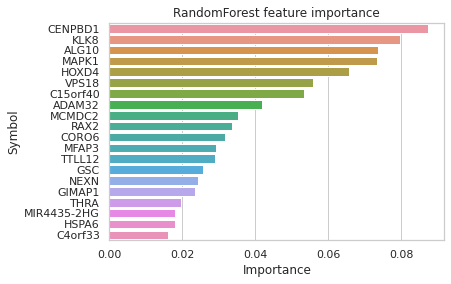

In [89]:
graph_importances(clf, "RandomForest")

In [90]:
clf = DecisionTreeClassifier(
    class_weight="balanced", 
    random_state=0, 
    max_depth = 25,
    min_samples_split=3,
    criterion="gini",
)
clf.fit(X_sel_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=25,
                       min_samples_split=3, random_state=0)

In [91]:
print_results(clf, X_sel_test)

Accuracy:  1.0
Sensitivity:  1.0
Sepcificity:  1.0
Counfsion Matrix: 
 [[40  0]
 [ 0 10]]


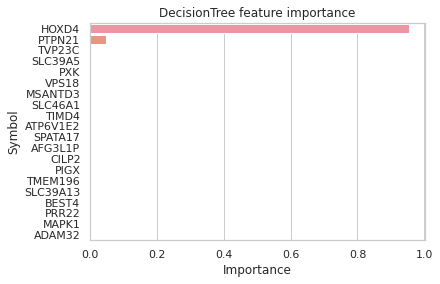

In [92]:
graph_importances(clf, "DecisionTree")

# Lime

In [93]:
import lime
import lime.lime_tabular

In [94]:
predict_lgbm = lambda x: clf.predict_proba(x).astype(float)

In [95]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_sel_train,
    training_labels=y_train,
    feature_names=features,
    feature_selection="lasso_path",
    class_names=["CTRL", "M4"],
)

In [96]:
exp = lime_explainer.explain_instance(X_sel_test[0], predict_lgbm, num_features=5)

In [97]:
exp.show_in_notebook(show_table=True)

In [98]:
from lime import submodular_pick

In [99]:
sp = submodular_pick.SubmodularPick(lime_explainer, X_sel_train, predict_lgbm, method="full", num_features=20, num_exps_desired=5)

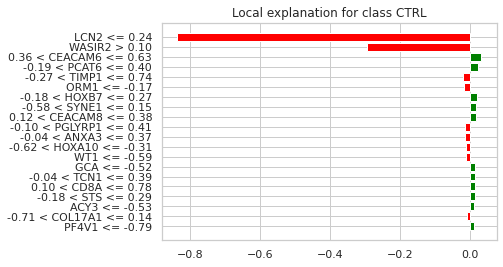

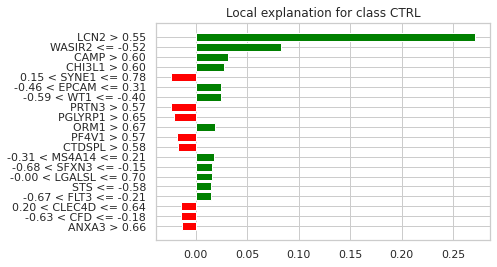

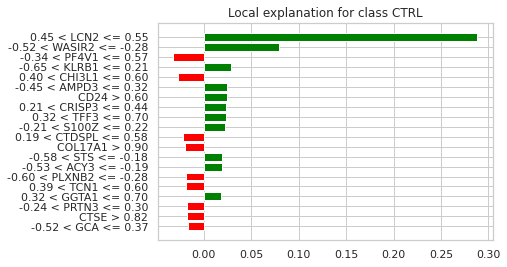

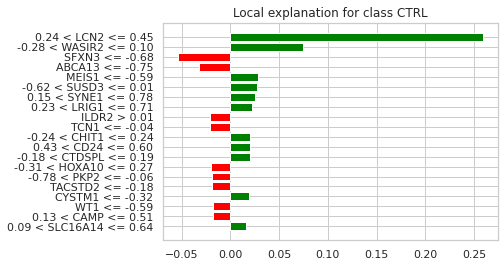

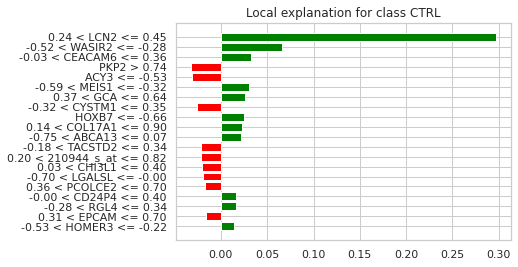

In [100]:
for i, exp in enumerate(sp.sp_explanations):
    fig = exp.as_pyplot_figure(label=exp.available_labels()[0])
    fig.savefig(str(i), bbox_inches='tight')

In [101]:
# Make it into a dataframe
W_pick=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp.sp_explanations]).fillna(0)
 
W_pick['prediction'] = [this.available_labels()[0] for this in sp.sp_explanations]
 
#Making a dataframe of all the explanations of sampled points
W=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp.explanations]).fillna(0)
W['prediction'] = [this.available_labels()[0] for this in sp.explanations]


In [102]:
#Plotting the aggregate importances
fig=np.abs(W.drop("prediction", axis=1)).mean(axis=0).sort_values(ascending=False).head(
    25
).sort_values(ascending=True).iplot(kind="barh")

#Aggregate importances split by classes
grped_coeff = W.groupby("prediction").mean()
 
grped_coeff = grped_coeff.T
grped_coeff["abs"] = np.abs(grped_coeff.iloc[:, 0])
grped_coeff.sort_values("abs", inplace=True, ascending=False)
grped_coeff.head(25).sort_values("abs", ascending=True).drop("abs", axis=1).iplot(
    kind="barh", bargap=0.5
) 


# Learning curves

In [103]:
from sklearn.model_selection import learning_curve

In [104]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    fig = plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    fig.savefig(title+".png")
    return plt


In [105]:
skf = StratifiedKFold(n_splits=10)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


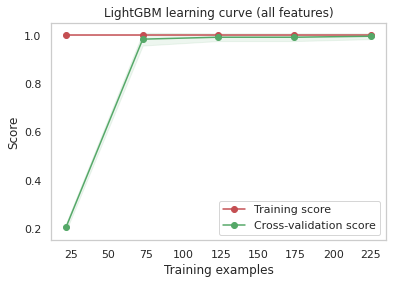

In [106]:
g = plot_learning_curve(
    lgb.LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    min_gain_to_split=0.001,
    n_jobs=4,
    **lgbm_params,
    ),
    "LightGBM learning curve (all features)",
    X, y, cv=skf,
)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversio

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001


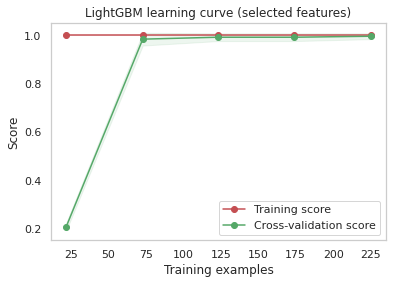

In [107]:
g = plot_learning_curve(
    lgb.LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    min_gain_to_split=0.001,
    n_jobs=4,
    **lgbm_params,
    ),
    "LightGBM learning curve (selected features)",
    X_sel, y, cv=skf,
)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/s

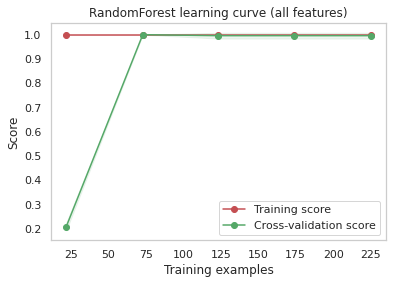

In [108]:
g = plot_learning_curve(
    RandomForestClassifier(
    class_weight="balanced", 
    random_state=0, 
    **rf_params,
    ),
    "RandomForest learning curve (all features)",
    X, y, cv=skf,
)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/s

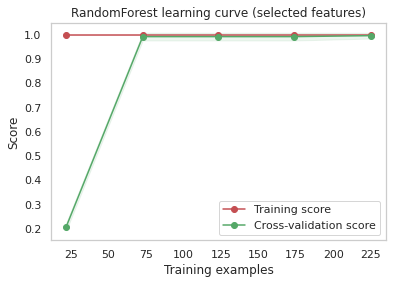

In [109]:
g = plot_learning_curve(
    RandomForestClassifier(
    class_weight="balanced", 
    random_state=0, 
    **rf_params,
    ),
    "RandomForest learning curve (selected features)",
    X_sel, y, cv=skf,
)